In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../data/preprocessedData.csv')
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud


# 🤔Exploring

In [4]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

- handling null values
    - FastagID column has 549 null values
    - mean ke jagah par median/mode use karta hu 
    - talk with the head and find out a way 
    - drop those columns having null values

In [5]:
df['FastagID'].mode()[0]
# iski frequency sabse jyada hai and fill every null value with this value

'FTG-000-QAZ-210'

In [6]:
df['FastagID'].fillna(df['FastagID'].mode()[0], inplace=True)
df.isnull().sum()


C:\Users\GAURAV MAURYA\AppData\Local\Temp\ipykernel_7908\1616979510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FastagID'].fillna(df['FastagID'].mode()[0], inplace=True)


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [7]:
df['Vehicle_Plate_Number']

0       KA11AB1234
1       KA66CD5678
2       KA88EF9012
3       KA11GH3456
4       KA44IJ6789
           ...    
4995    KA74ST0123
4996    KA38UV3456
4997    KA33WX6789
4998    KA35YZ0123
4999    KA37AB3456
Name: Vehicle_Plate_Number, Length: 5000, dtype: object

In [8]:
df["state_code"] = df['Vehicle_Plate_Number'].str[:2]

In [9]:
df.sample()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,state_code
1793,1794,11/29/2023 0:45,Car,FTG-150-LMN-345,A-101,Regular,Small,70,70,"12.936687032945434, 77.53113977439017",53,KA34NO1239,Not Fraud,KA


In [10]:
#remove vehicle number plate feature from vehicle plate number
df = df.drop("Vehicle_Plate_Number", axis=1)

In [11]:
df.sample(2)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code
4914,4915,3/23/2023 17:20,SUV,FTG-374-VFR-092,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",62,Not Fraud,AP
477,478,4/14/2023 6:40,Car,FTG-478-NJH-852,A-101,Regular,Small,120,120,"13.059816123454882, 77.77068662374292",73,Not Fraud,KA


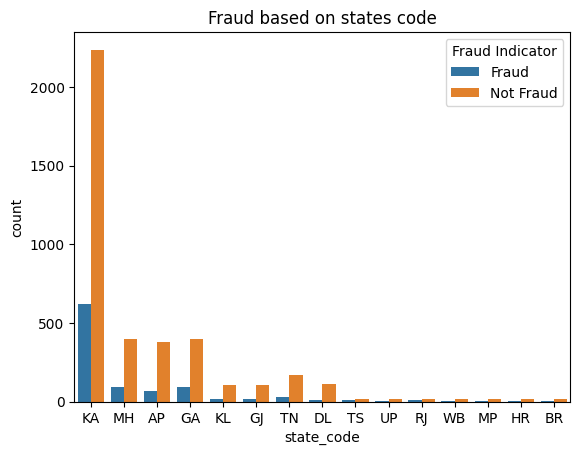

In [14]:
#visualise fraud based o states
sns.countplot(x='state_code',
              data=df,
              hue='Fraud_indicator')
plt.title("Fraud based on states code")
plt.xlabel("state_code")
plt.ylabel("count")
plt.legend(title="Fraud Indicator")
plt.show()

In [15]:
df['state_code'].value_counts()

state_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [16]:
df.loc[df['Fraud_indicator'] == "Fraud", "state_code"].value_counts()

state_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

## Observation - 4
- Highest Fraud count is in Karnataka(KA)
- Madhya Pradesh Has the lowest fraud count

# 🤔Playing with time

In [17]:
# timestamp feature
# fraud kiss time par jyada hai 
df['Timestamp'].sample(3)

2877    5/28/2023 23:48
3829    12/15/2023 0:50
3778      8/8/2023 5:26
Name: Timestamp, dtype: object

In [18]:
type(df['Timestamp'])

pandas.core.series.Series

In [19]:
# convert series into datetime format
df['Timestamp'] =  pd.to_datetime(df['Timestamp']) 
type(df['Timestamp'])


pandas.core.series.Series

In [20]:
df["Hour"] = df['Timestamp'].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.day_of_week
df["Month"] = df["Timestamp"].dt.month

In [21]:
#drop timestamp feature because now ab hume unka kaam nahi hai 
df = df.drop("Timestamp", axis=1)

In [22]:
df["DayOfWeek"].value_counts()

DayOfWeek
6    743
1    728
0    716
4    713
5    709
2    697
3    694
Name: count, dtype: int64

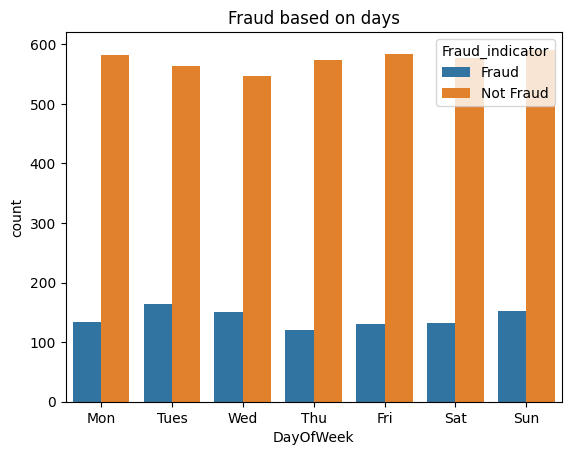

In [23]:
#visualise based of days
sns.countplot(x='DayOfWeek',
              data=df,
              hue='Fraud_indicator')
plt.xticks([0,1,2,3,4,5,6] , ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Fraud based on days")
plt.xlabel("DayOfWeek")
plt.ylabel("count")
plt.show()

# 🤔Correlation Matrix

In [24]:
numericalDf = df.select_dtypes("number")

In [25]:
corr_matrix = numericalDf.corr()
corr_matrix
# -1 => No relation at all
# 0 => no relation
# 1 => highly correlated
# plotted using headmap

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


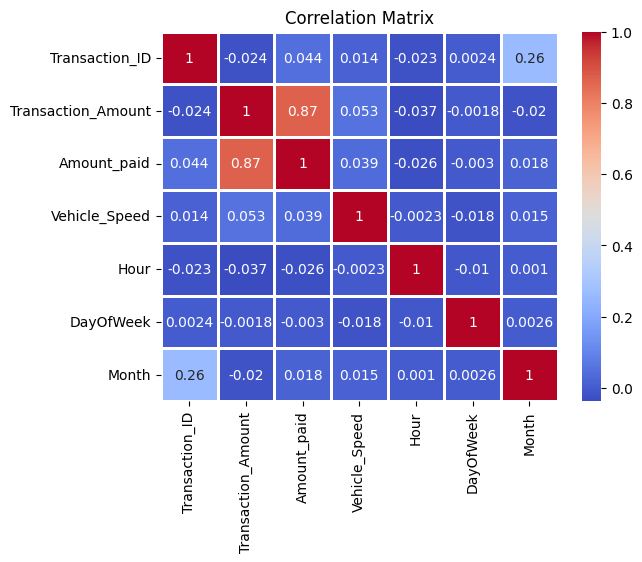

In [26]:
sns.heatmap(corr_matrix,
            cmap="coolwarm",
            annot=True,
            linewidths=1)
plt.title("Correlation Matrix")
plt.show()

## Observation - 5
- Amount_paid and transition amount are highly corelated

# 🤔Feature Selection

In [27]:
#removing unnecessary columns
df = df.drop(["Transaction_ID", "Geographical_Location"],  axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   FastagID            5000 non-null   object
 2   TollBoothID         5000 non-null   object
 3   Lane_Type           5000 non-null   object
 4   Vehicle_Dimensions  5000 non-null   object
 5   Transaction_Amount  5000 non-null   int64 
 6   Amount_paid         5000 non-null   int64 
 7   Vehicle_Speed       5000 non-null   int64 
 8   Fraud_indicator     5000 non-null   object
 9   state_code          5000 non-null   object
 10  Hour                5000 non-null   int32 
 11  DayOfWeek           5000 non-null   int32 
 12  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(7)
memory usage: 449.3+ KB


In [29]:
df

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayOfWeek,Month
0,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,65,Fraud,KA,11,4,1
1,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,78,Fraud,KA,14,5,1
2,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,53,Not Fraud,KA,18,6,1
3,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,92,Fraud,KA,2,0,1
4,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,60,Fraud,KA,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,81,Not Fraud,KA,22,6,1
4996,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,64,Not Fraud,KA,13,1,1
4997,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,93,Not Fraud,KA,5,6,2
4998,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,57,Not Fraud,KA,20,0,2


In [31]:
# drop tollbooth and fasttag id
df = df.drop(["TollBoothID", "FastagID"], axis=1)
df.sample(1)

KeyError: "['TollBoothID', 'FastagID'] not found in axis"

In [32]:
df.sample(1)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayOfWeek,Month
3630,Truck,Express,Large,340,340,50,Not Fraud,KA,2,6,10


In [33]:
#drop hour dayofweek and month
df = df.drop(["Hour", "DayOfWeek", "Month"], axis=1)
df.sample(1)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code
3049,Truck,Regular,Large,290,290,48,Not Fraud,KA


In [34]:
#drop vehicle_speed
df = df.drop("Vehicle_Speed", axis=1)
df.sample(1)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Fraud_indicator,state_code
4589,Truck,Regular,Large,330,330,Not Fraud,MP


# 🤔Label Encoding

In [36]:
# apply label encoding in object data type features
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [40]:
df.columns

Index(['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Fraud_indicator', 'state_code'],
      dtype='object')

In [41]:
objectColumns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','Fraud_indicator', 'state_code']

In [42]:
label_encoder = {}
for column in objectColumns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [43]:
df.sample(2)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Fraud_indicator,state_code
2784,6,0,1,140,140,1,6
1475,4,1,1,120,120,1,6


In [44]:
print(label_encoder)

{'Vehicle_Type': LabelEncoder(), 'Lane_Type': LabelEncoder(), 'Vehicle_Dimensions': LabelEncoder(), 'Fraud_indicator': LabelEncoder(), 'state_code': LabelEncoder()}


In [45]:
label_encoder["Fraud_indicator"]

LabelEncoder()

In [46]:
label_encoder["Fraud_indicator"].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

In [48]:
df.to_csv('../data/label_encoded_data.csv', index=False)

# 🤔Downlaod Lebel Encoder

In [53]:
import joblib
import os

In [55]:
os.makedirs('../models', exist_ok=True)

In [58]:
# Save the label encoders to a file in the 'models' directory
joblib.dump(label_encoder, '../models/label_encoders.joblib')

['../models/label_encoders.joblib']